In [1]:
###eigen phase
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
## pca-princple component analysis
from sklearn.decomposition import PCA
import pickle
#load pcikle data

In [11]:
import pandas as pd
data = pd.read_pickle('data_images_100_100.pickle')
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


In [17]:
## eigen face
#splitng data into dpeendent and undependent variablrs
x=data.drop('gender',axis=1).values
x.shape
mean_face=x.mean(axis=0)
mean_face.shape

(10000,)

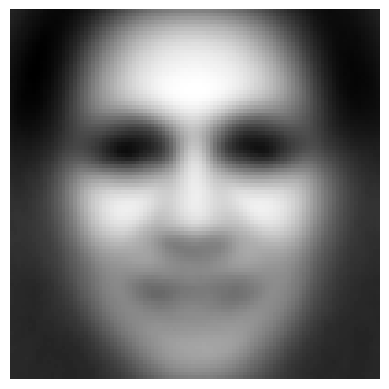

In [19]:
#visualizing mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [20]:
#substract data with mean face
x_transformed=x-(mean_face)

In [25]:
#aply to PCA 
# find right no. of componensts
pca=PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(x_transformed)

PCA(whiten=True)

In [31]:
exp_var_df=pd.DataFrame()
exp_var_df['explained_var']=pca.explained_variance_ratio_
exp_var_df['cum_explained_var']=exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components']=np.arange(1,len(exp_var_df)+1)
exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251699,0.251699,1
1,0.114162,0.365860,2
2,0.105622,0.471482,3
3,0.051887,0.523369,4
4,0.033064,0.556433,5


In [32]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

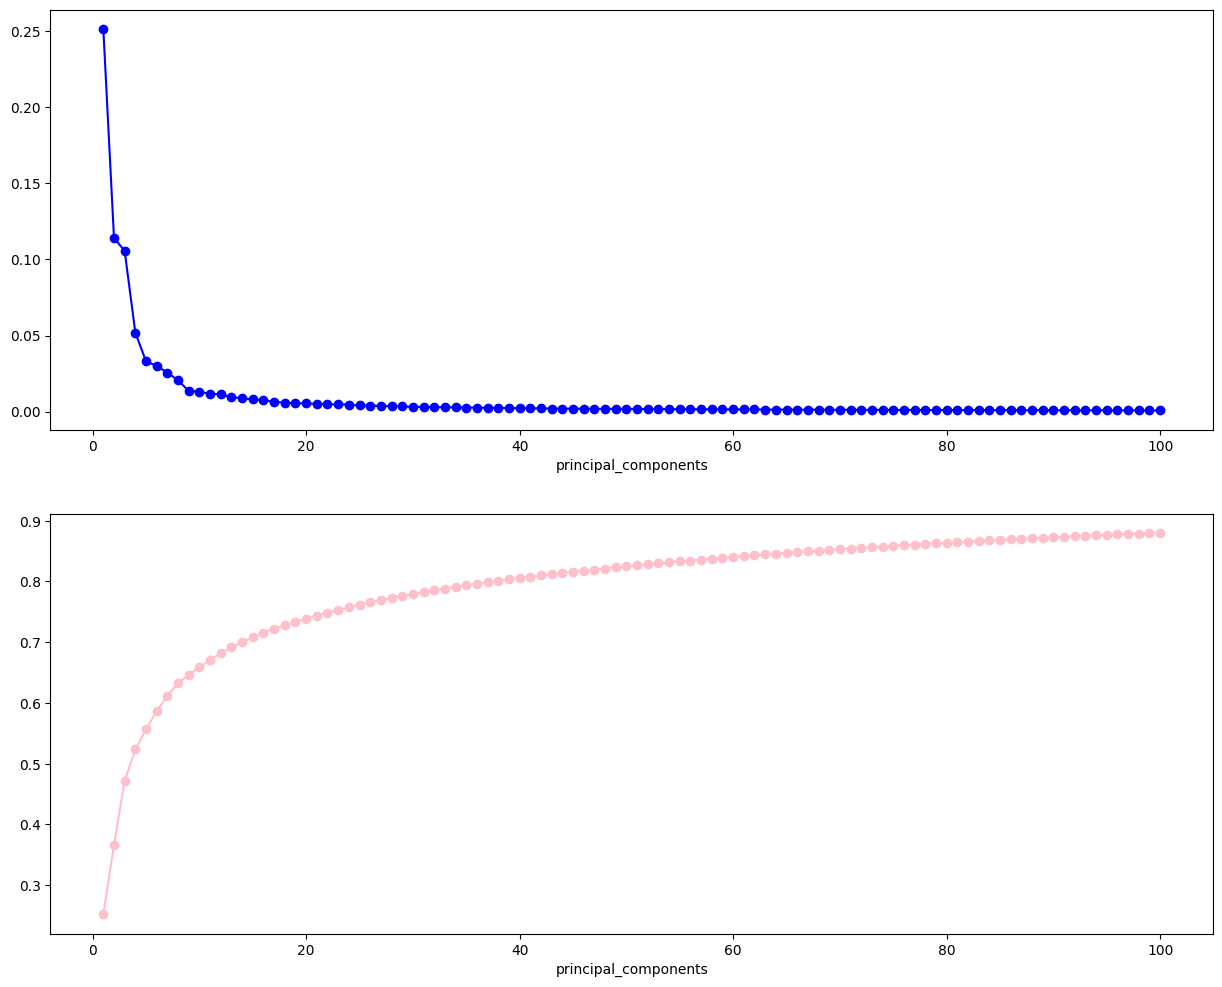

In [38]:
#elbow and cumulative plot
fig,ax=plt.subplots(nrows=2,figsize=(15,12))
exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0],color='blue')
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1],color='pink')

In [40]:
# we take 50 components and 80% coverage
#train PCA
pca_50=PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data=pca_50.fit_transform(x_transformed)

In [43]:
#saving all the results
y=data['gender'].values# indpeendent variables
np.savez('data_pca_50_target',pca_data,y)


In [46]:
pca_dict={'pca':pca_50,'mean_face':mean_face}
pickle.dump(pca_dict,open('pca_dict_pickle','wb'))

In [47]:
pca_data_inv=pca_50.inverse_transform(pca_data)

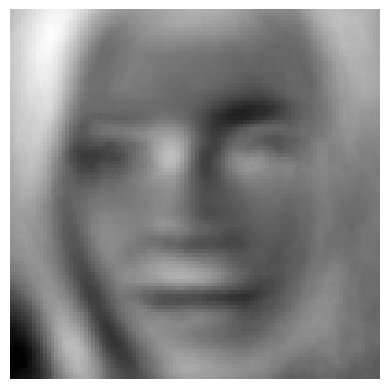

In [48]:
eig_img=pca_data_inv[0,:].reshape((100,100))
plt.imshow(eig_img,cmap='gray')
plt.axis('off')
plt.show()

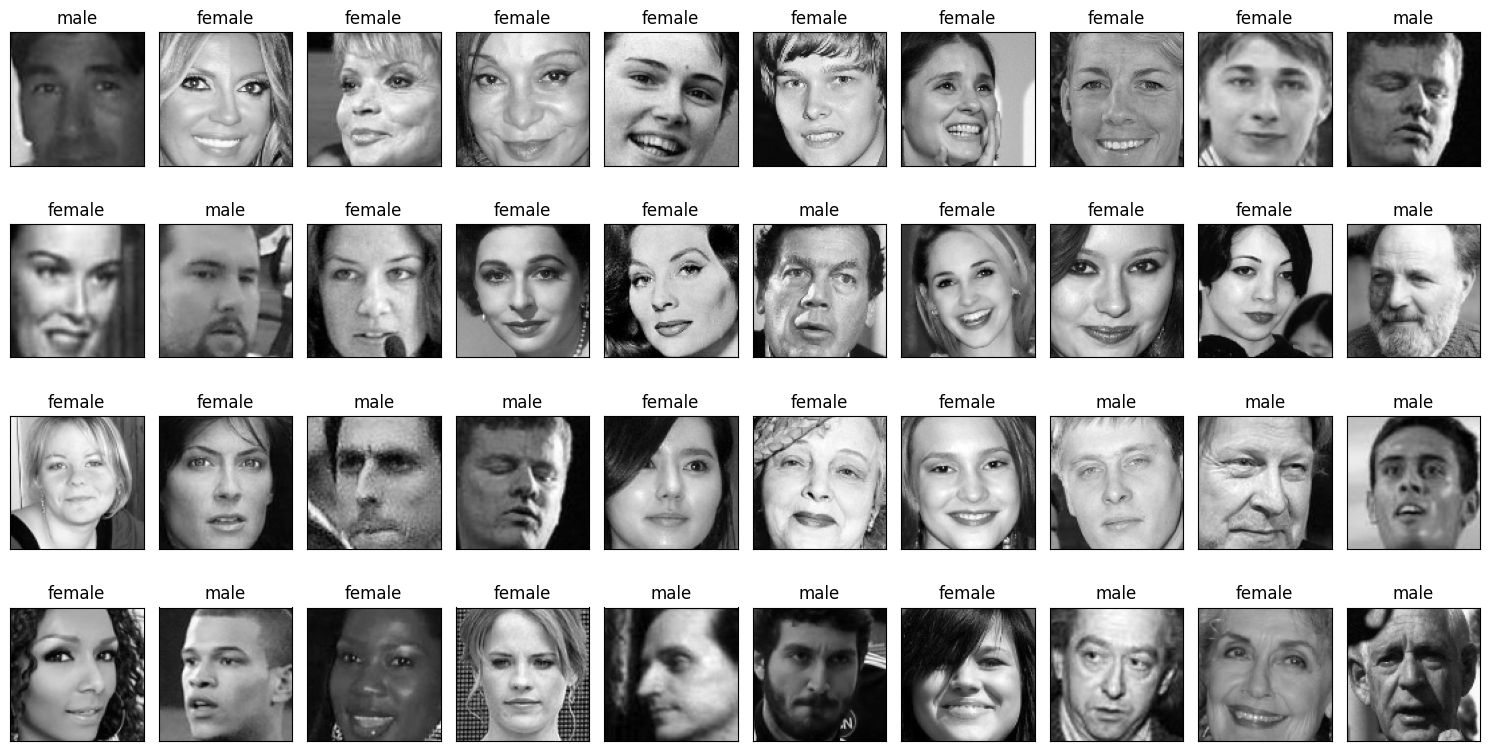

==================== Eigen Images ====================


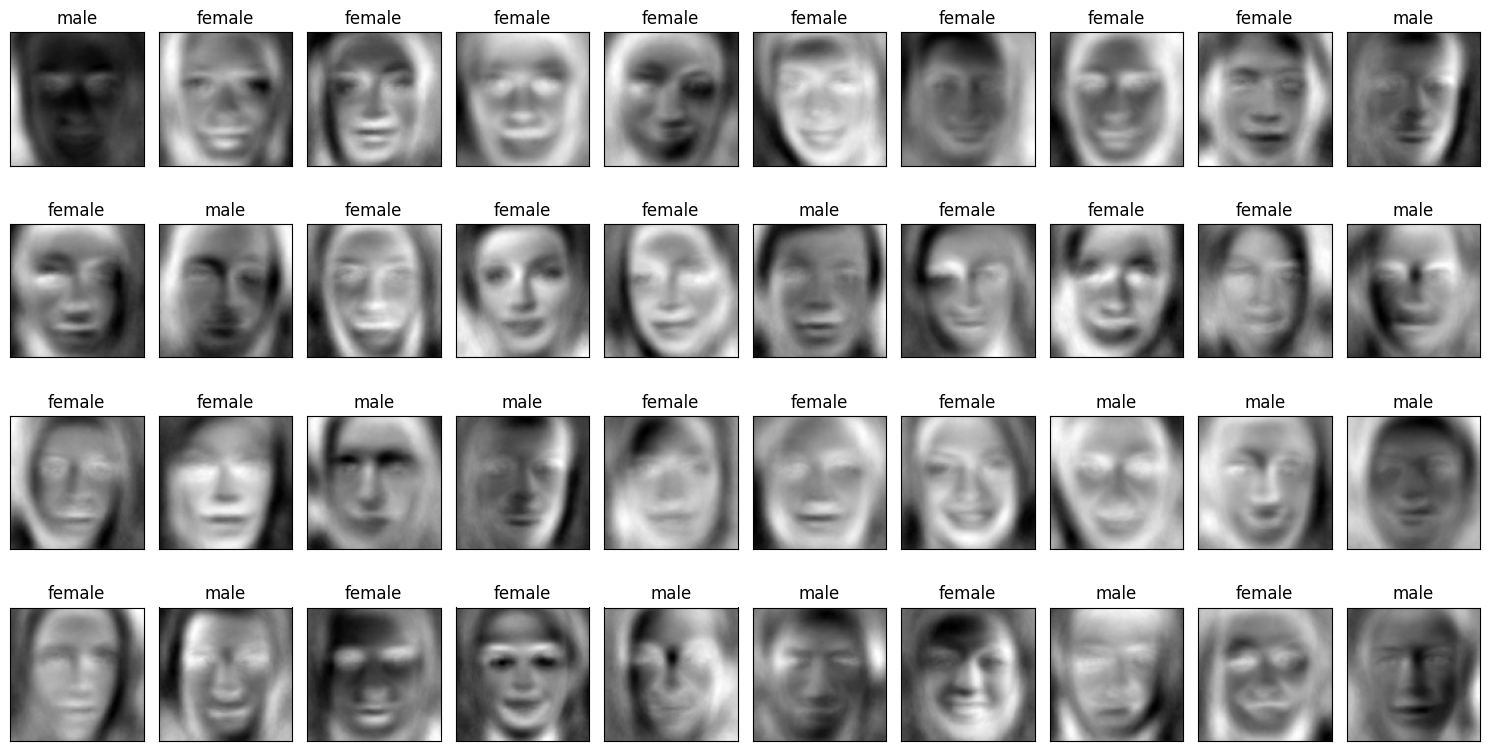

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed and select random images
np.random.seed(1001)
pic = np.random.randint(0, 4319, 40)

# Plot original images
plt.figure(figsize=(15, 8))
for i, pic in enumerate(pics):
    plt.subplot(4, 10, i+1)
    img = x[pic:pic+1].reshape(100, 100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))  # Fixed format string
    plt.xticks([])  # Fixed: Changed from duplicate yticks to xticks
    plt.yticks([])
plt.tight_layout()  # Added for better spacing
plt.show()

# Plot eigen images
print("="*20 + " Eigen Images " + "="*20)  # Fixed string formatting
plt.figure(figsize=(15, 8))
for i, pic in enumerate(pics):
    plt.subplot(4, 10, i+1)
    img = pca_data_inv[pic:pic+1].reshape(100, 100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))  # Fixed format string
    plt.xticks([])  # Fixed: Changed from duplicate yticks to xticks
    plt.yticks([])
plt.tight_layout()  # Added for better spacing
plt.show()